<!--BOOK_INFORMATION-->
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Feature Engineering](05.04-Feature-Engineering.ipynb) | [Contents](Index.ipynb) | [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Introduction
In this notebook..
Source: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb
The original text by the author is written in gray to improve readability

# Change Log
Summary of the changes made:
<ol>
    <li>All the comments added into the code</li>
    <li>For the initial example under the Gaussian Naive Bayes header I changed some values like standard deviation, amount of points, amount of clusters, etc.</li>
    <li>Added another example for classifying text</li>
    <li>For the original classifying example added comments explaining in more detail what the author was doing</li>
</ol>

# In Depth: Naive Bayes Classification

<span style="color: grey;">The previous four sections have given a general overview of the concepts of machine learning.
In this section and the ones that follow, we will be taking a closer look at several specific algorithms for supervised and unsupervised learning, starting here with naive Bayes classification.</span>

<span style="color: grey;">
Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.
Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.
This section will focus on an intuitive explanation of how naive Bayes classifiers work, followed by a couple examples of them in action on some datasets.</span>

## Bayesian Classification
<span style="color: grey;">
Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:
</span>

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes
<span style="color: grey;">
Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:
</span>

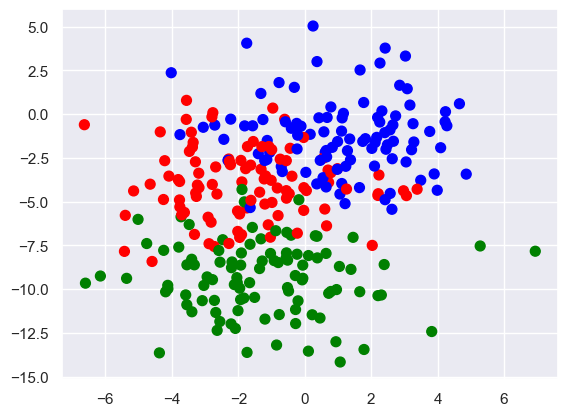

In [32]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['green', 'blue', 'red'])
# Below a library is used to generate a random dataset used for naive bayes classification or 
# k-means clustering
from sklearn.datasets import make_blobs
# The make_blobs function is used to generate a dataset of points that are clustered together
# The parameters passed into it mean the following:
# 300 = number of points
# 2 = number of features
# centers=3 = number of clusters
# random_state=2 = random seed
# cluster_std=2 = standard deviation of the clusters
X, y = make_blobs(300, 2, centers=3, random_state=2, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=colors) # Creates the scatter graph

<span>
Changes Made:
<ol>
    <li>Added Comments</li>
    <li>Added 200 more points</li>
    <li>Extra center</li>
    <li>Colors added for the 3 clusters</li>
</ol>
</spam>

<span style="color: grey;">
One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.
This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.
The result of this naive Gaussian assumption is shown in the following figure:
</span>

<span style="color:grey;">![(run code in Appendix to generate image)](figures/05.05-gaussian-NB.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Gaussian-Naive-Bayes)</span>

<span style="color: grey;">
The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:
</span>

In [33]:
# Here the Gaussian naive bayes model is trained on the dataset imported above
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

<span>
Changes Made:
<ol>
    <li>Added Comments</li>
</ol>
</span>

<span style="color: grey;">Now let's generate some new data and predict the label:</span>

In [34]:
# Random data is generated and then the model is used to predict the classification of the data
rng = np.random.RandomState(0)
Xnew = [-8, -18] + [16, 25] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Values for the features in Xnew needed to be adjusted to account for the increased standard deviation.<br><br>
<span>
Changes Made:
<ol>
    <li>Added Comments</li>
    <li>Changed the range of values to better reflect the new cluster</li>
</ol>
</span>

<span style="color: grey;">Now we can plot this new data to get an idea of where the decision boundary is:</span>

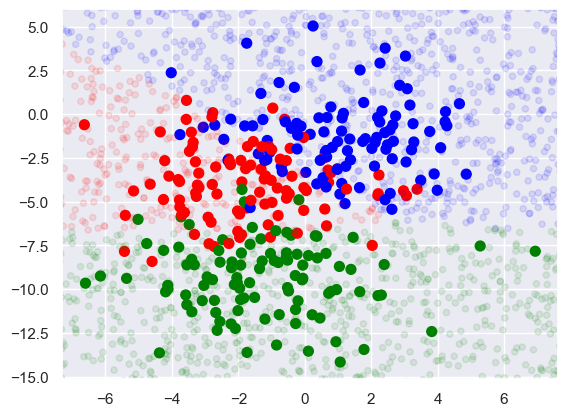

In [35]:
# The originial data that the model was trained on is plotted
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=colors)
lim = plt.axis() # Sets the x and y limits for display
# Scatter graph is crated based on the randomly generated data above
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap=colors, alpha=0.1)
plt.axis(lim);

As you can see above due to the higher standard deviation parameter passed into the make blobs function above the points are more mixed together and there isn't an easy to see divide between the specific clusters.<br><br>
<span>
Changes Made:
<ol>
    <li>Added Comments</li>
    <li>Additional cluster</li>
    <li>Colors changed for the clusters</li>
</ol>
</span>

<span style="color: grey;">We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.</span>

<span style="color: grey;">
A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:
</span>

In [36]:
# Below the probability of the data being in each class is calculated
yprob = model.predict_proba(Xnew)
# The last 8 probabilities are gathered and rounded to 2 decimal places
yprob[-8:].round(2)

array([[0.15, 0.  , 0.85],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.81, 0.  , 0.19],
       [0.97, 0.  , 0.03],
       [0.  , 0.97, 0.03],
       [1.  , 0.  , 0.  ]])

Changes Made:
<ol>
    <li>Added Comments</li>
</ol>
</spam>

<span style="color: grey;">The columns give the posterior probabilities of the first and second label, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.</span>

<span style="color: grey;">
Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.
</span>

## Multinomial Naive Bayes
<span style="color: grey;">

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.
</span>

### Example: Classifying Text - 20 newsgroups 
<span style="color: grey;">
One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.</span><br><br>
 
<span style="color: grey;">
Let's download the data and take a look at the target names:
</span>

In [37]:
# Imports a dateaset containing 20 Newsgroups articles Categories
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

<span style="color: grey;"> simplicity here, we will select just a few of these categories, and download the training and testing set:</span>

In [38]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

<span style="color: grey;">Here is a representative entry from the data:</span>

In [39]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



<span style="color: grey;">In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer (discussed in [Feature Engineering](05.04-Feature-Engineering.ipynb)), and create a pipeline that attaches it to a multinomial naive Bayes classifier:</span>

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# The model is created using the pipeline function 
# a tfidf vectorizer is used to convert the text into a matrix of tfidf features so the machine learning model can be trained on it
# MultionomialNB model is applied to the pipeline for classification
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

<span style="color: grey;">With this pipeline, we can apply the model to the training data, and predict labels for the test data:</span>

In [41]:
# The model is trained on the training data
model.fit(train.data, train.target)
# labels stores the prediction of the model on the test data
labels = model.predict(test.data)

<span style="color: grey;">Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:</span>

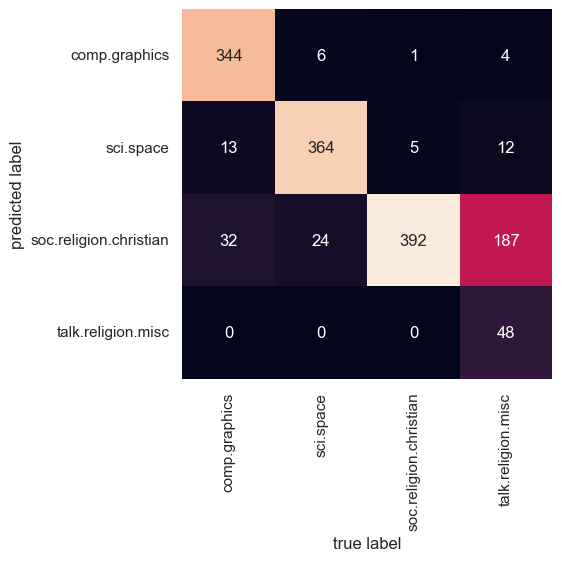

In [42]:
# Below is a confusion matrix that is used to show the accuracy of the model
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

<span style="color: grey;">
Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!<br>

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:
</span>

In [43]:
# A function is created that is used to predict wether a certain title is in a certain category
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

<span style="color: grey;">Let's try it out:</span>

In [44]:
predict_category('sending a payload to the ISS')

'sci.space'

In [45]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [46]:
predict_category('determining the screen resolution')

'comp.graphics'

<span style="color: grey;">Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.</span>

### Example: Classifying Text - Sentiment analysis of tweets for apple products

#### Data Import

In [47]:
import pandas as pd
path = "C:\\Users\\dawid\\Desktop\\tweets.csv"
data = pd.read_csv(path)
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [48]:
data['is_there_an_emotion_directed_at_a_brand_or_product'] = data['is_there_an_emotion_directed_at_a_brand_or_product'].map(
    {"No emotion toward brand or product": 2, 'Positive emotion': 1, 'Negative emotion': 0})
data.dropna(inplace=True)

Above I convert the negative, neutral and positive into numerical values, also I drop any empty values.

#### Splitting data into training and testing sets

In [55]:
from sklearn.model_selection import train_test_split
x = data['tweet_text']
y = data['is_there_an_emotion_directed_at_a_brand_or_product']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

I set the x as the text withing the tweet and y as the sentiment associated with it

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [57]:
# The model is trained on the training data
model.fit(X_train, y_train)
# labels stores the prediction of the model on the test data
labels = model.predict(X_test)

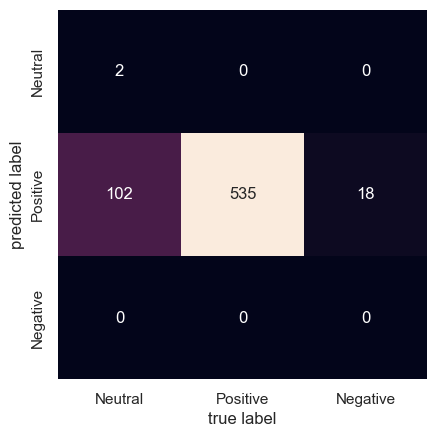

In [58]:
# Below is a confusion matrix that is used to show the accuracy of the model
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

trainLabels = ['Neutral', 'Positive', 'Negative']
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=trainLabels, yticklabels=trainLabels)
plt.xlabel('true label')
plt.ylabel('predicted label');

As you can see the model is quite biased towards one side this could be due to several reasons:<br>
    1. Dataset heavily leaning towards positive<br>
    2. 

In [59]:
# A function is created that is used to predict wether a certain tweet has certain sentiment
def predict_category(s, labelNames, model):
    pred = model.predict([s])
    return labelNames[int(pred[0])]

In [60]:
textNegative = "Iphones are horrible, worthless and overpriced"
textNeutral = "Iphones are 10 years old"
textPositive = "Iphones are amazing"
labelNames = ['Neutral', 'Positive', 'Negative']
print(predict_category(textNegative, labelNames, model))
print(predict_category(textNeutral, labelNames, model))
print(predict_category(textPositive, labelNames, model))

Positive
Positive
Positive


#### Improvements Section

## When to Use Naive Bayes
<span style="color: grey;">
Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.
</span>

<!--NAVIGATION-->
< [Feature Engineering](05.04-Feature-Engineering.ipynb) | [Contents](Index.ipynb) | [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
